# CSE 252A Computer Vision I Fall 2025 - Assignment 3

Instructor: Ben Ochoa

Assigment due: Wed, Nov 19, 11:59 PM

**Name: Mehul Maheswari**

**PID: A16478228**

## Instructions

Please answer the questions below using Python in the attached Jupyter notebook and follow the guidelines below:

- This assignment must be completed **individually**. For more details, please follow the Academic Integrity Policy and Collaboration Policy on [Canvas](https://canvas.ucsd.edu).

- All the solutions must be written in this Jupyter notebook.

- You may use basic algebra packages (e.g. `NumPy`, `SciPy`, etc) but you are not allowed to use the packages that directly solve the problems. Feel free to ask the instructor and the teaching assistants if you are unsure about the packages to use.

- It is highly recommended that you begin working on this assignment early.

- You must **submit 3 files: the Notebook, the PDF and the python file** (i.e. the `.ipynb`, the `.pdf` and the `.py` files) on Gradescope. **You must mark each problem on Gradescope in the pdf.**
    - To convert the notebook to PDF, you can choose one way below:

        - You may first export the notebook as HTML, and then print the web page as PDF

            - e.g., in Chrome: File $\rightarrow$ Save and Export Notebook as $\rightarrow$ "HTML"; or in VScode: Open the Command Palette by pressing Ctrl+Shift+P (Windows/Linux) or Cmd+Shift+P (macOS), search for Jupyter: Export to HTML
    
            - Open the saved web page and right click $\rightarrow$ Print... $\rightarrow$ Choose "Destination: Save as PDF" and click "Save")

        - If you have XeTex installed on your machine, you may directly export the notebook as PDF: e.g., in Chrome, File $\rightarrow$ Save and Export Notebook as $\rightarrow$ "PDF"

        - You may use [nbconvert](https://nbconvert.readthedocs.io/en/latest/install.html) to convert the ipynb file to pdf using the following command
        `jupyter nbconvert --allow-chromium-download --to webpdf filename.ipynb`

    - To convert the notebook to python file, you can choose one way below:

        - You may directly export the notebook as py: e.g., in Chrome, File $\rightarrow$ Save and Export Notebook as $\rightarrow$ "Executable script"; or in VScode: Open the Command Palette and search for Jupyter: Export to Python Script

        - You may use [nbconvert](https://nbconvert.readthedocs.io/en/latest/install.html) to convert the ipynb file to python file using the following command
    `jupyter nbconvert --to script filename.ipynb --output output_filename.py`

- Please make sure the content in each cell (e.g. code, output images, printed results, etc.) are clearly visible and are not cut-out or partially cropped in your final PDF file.

- While submitting on gradescope, please make sure to assign the relevant pages in your PDF submission for each problem.

**Late Policy:** Assignments submitted late will receive a 15% grade reduction for each 12 hours late (i.e., 30% per day). Assignments will not be accepted 72 hours after the due date. If you require an extension (for personal reasons only) to a due date, you must request one as far in advance as possible. Extensions requested close to or after the due date will only be granted for clear emergencies or clearly unforeseeable circumstances.

## Problem 1: Multiscale image representations [16 pts]

In Lecture 9, given an image, we compare its multiscale representation generated by **Gaussian Image Pyramid** and **Scale-space** methods. The task for this problem is to first build multiscale representations for image `p1/ds3.jpg`, then **comment on** your results obtained by generating a Gaussian pyramid for an image versus those obtained by generating its scale-space representation.

For the Gaussian pyramid, use a binomial kernel of size 5x5 as an approximation for the Gaussian filter. Use mirror padding (you may use `numpy.pad`) followed by a valid shape convolution for Gaussian filtering. The sampling rate between levels is $rate=2$. 

For the scale-space representation, perform Gaussian filtering in the frequency domain by:
- Use the boarder mirror padding covered in Lecture 9 for the input image.
- Perform forward Fourier transform.
- Apply the Gaussian filter given certian standard deviation
- Perform the inverse Fourier transform
- Remove the mirror padding.

You may use `numpy.fft.fft2` and  `numpy.fft.ifft2` for forward and inverse Fourier tramsform.

You need to construct the Gaussian pyramid of rate 2 from level 0 to level 9, as well as the scale-space representation with the standard deviations corresponding those in the levels of a Gaussian pyramid of rate 2. Note that level 0 is just the original image in both the representations. Look at the lecture slides to see the correspondence between pyramid levels and standard deviation for the Gaussian filter in scale space. 

Use the provided plotting function to visualize the results.

### Problem 1.1 Gaussian pyramid [4 points]

In [5]:
import numpy as np
from imageio.v2 import imread
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.signal import convolve
import scipy.special
import copy
from numpy.fft import fft2, ifft2, fftshift

In [2]:
def binomial_kernel(size):
    """Creates a binomial filter kernel"""
    coeffs = np.array([scipy.special.binom(size-1, i) for i in range(size)]).reshape((-1,1))
    kernel = np.repeat(coeffs, repeats=size, axis=1).T
    kernel = kernel * coeffs
    return kernel / np.sum(kernel)

In [10]:
def gaussian_pyramid(img, num_levels):
    """This function construct the gaussian pyramid for the input image.

    Args:
    img: original image (level-0)
    num_levels: number of levels to generate (level-0 not included)
    
    Returns:
    pyramid: the pyramid as a list consisting of all level images.
             The first element of the list is the original image itself.
    """
    
    pyramid = []
    pyramid.append(img.copy()) # level-0 image
    
    ### YOUR CODE HERE
    filter = binomial_kernel(5)
    
    # Start with the original image for the first level
    current_img = img.copy()

    for i in range(num_levels):
        # mirror padding if needed
       
        # pad each channel
        padded_img = np.pad(current_img, ((2, 2), (2, 2), (0, 0)), mode='reflect')
        # Convolve each channel separately
        convolved_img = np.zeros_like(current_img)
        for c in range(current_img.shape[2]):
            convolved_img[:, :, c] = convolve(padded_img[:, :, c], filter, mode='valid')

        # scale down by factor of 2
        convolved_img = convolved_img[::2, ::2]
        pyramid.append(convolved_img)
        
        # Use the downsampled image as input for the next level
        current_img = convolved_img
    
    ### END YOUR CODE
    
    return pyramid

In [4]:
def plot_gaussian_pyramid(pyramid):            
    N = len(pyramid)
    for i in range(N):
        pyramid_img = pyramid[i]
        
        plt.imshow(pyramid_img)
        plt.axis('off')
        plt.title("Level {}".format(i))
        plt.show()

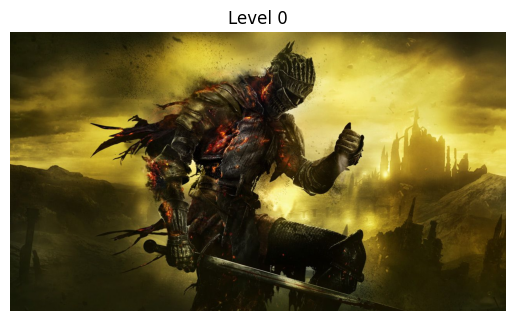

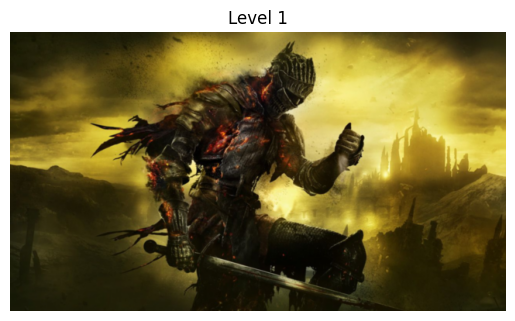

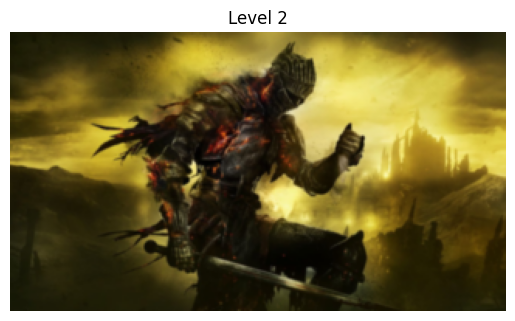

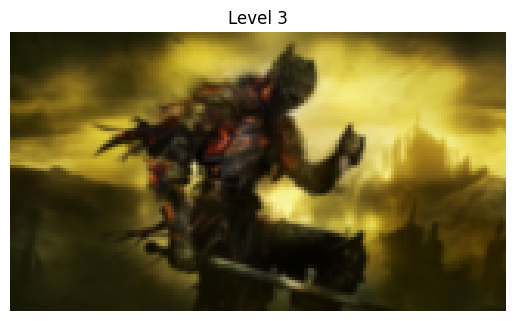

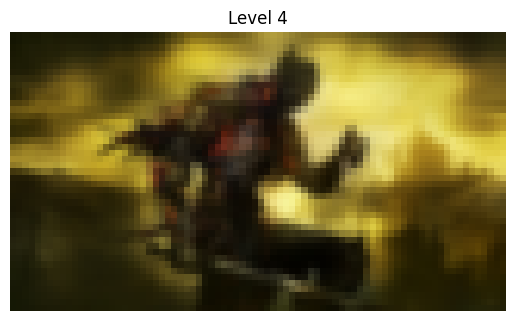

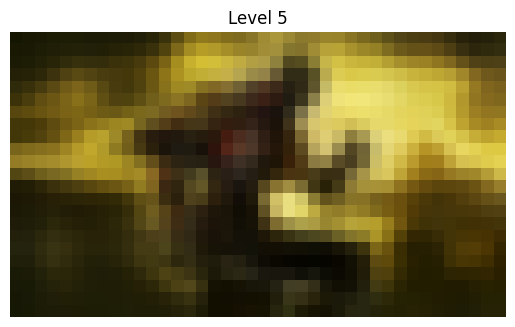

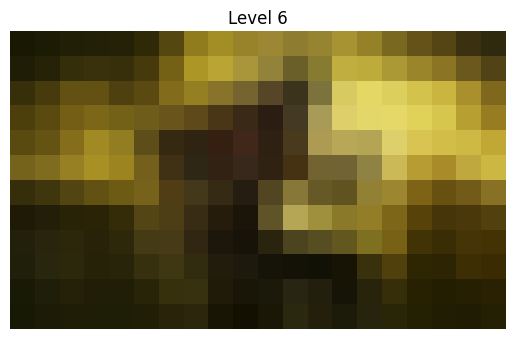

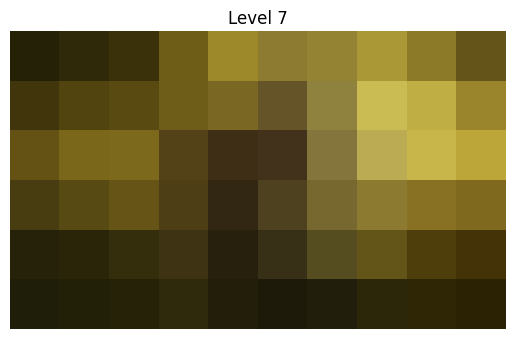

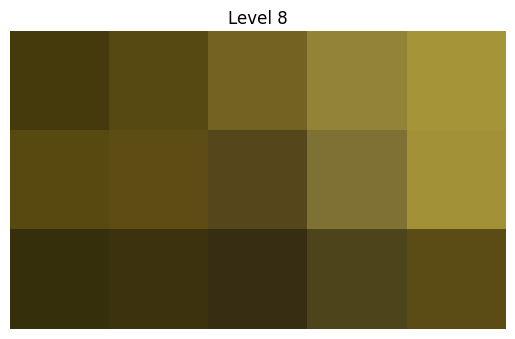

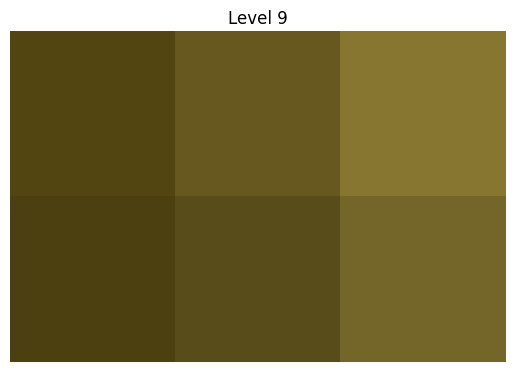

In [11]:
from imageio.v2 import imread
img = imread("p1/ds3.jpg")

### YOUR CODE HERE
pyramid = gaussian_pyramid(img, 9)
### END YOUR CODE

plot_gaussian_pyramid(pyramid)

### Problem 1.2 Mirror padding representation [3 points]

In [54]:
# scale-space representation
def mirror_padding(img):
    """ Mirrors the border pixels to extend the image. 
        See Lecture 9 for the instructions."""
    ### YOUR CODE HERE

    h, w, c = img.shape
    
    # mirror all columns except the first and last
    horiz_mirror = np.flip(img[:, 1:w-1, :], axis=1)
    img_padded = np.concatenate([img, horiz_mirror], axis=1)
    
    # mirror all rows except the first and last
    vert_mirror = np.flip(img_padded[1:h-1, :, :], axis=0)
    img_padded = np.concatenate([img_padded, vert_mirror], axis=0)
    
   
    ### END YOUR CODE
    return img_padded

def remove_mirror_padding(img_padded):
    """ Remove the mirrored border pixels. 
        See Lecture 9 for the instructions."""
    ### YOUR CODE HERE
    Hpad, Wpad, _ = img_padded.shape
    h = (Hpad + 2) // 2
    w = (Wpad + 2) // 2
    img = img_padded[:h, :w, :]
    
    ### END YOUR CODE
    return img

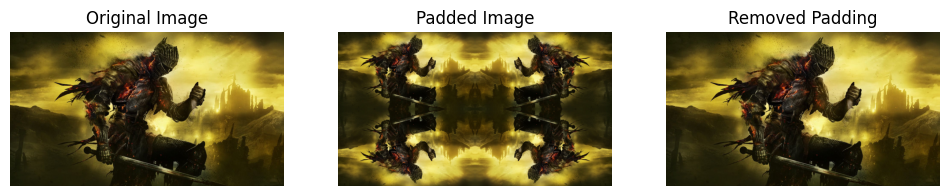

In [55]:
def plot_padding(img):
    """ Plots the padded image."""
    img_padded = mirror_padding(img)
    img_padded_removed = remove_mirror_padding(img_padded)
    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(131)
    ax1.imshow(img)
    ax1.axis('off')
    ax1.set_title("Original Image")
    ax2 = fig.add_subplot(132)
    ax2.imshow(img_padded)
    ax2.axis('off')
    ax2.set_title("Padded Image")
    ax3 = fig.add_subplot(133)
    ax3.imshow(img_padded_removed)
    ax3.axis('off')
    ax3.set_title("Removed Padding")
    plt.show()

plot_padding(img/255.0)

### Problem 1.3 Scale space representation [8 points]

In [78]:
def gaussian_kernel_fourier(shape, sigma):
    """ Generates a Gaussian filter in the Fourier domain.
        See Lecture 9 for the instructions. 
    Args:
    shape: shape of the image h,w 
    sigma: standard deviation of the Gaussian kernel
    Returns:
    H:     Gaussian filter in frequency domain 
    """
    ### YOUR CODE HERE
    h, w = shape

    # frequency indices
    u = np.arange(w)
    v = np.arange(h)

    # H = Hu * Hv
    # Hu(u) = exp(sigma^2*cos(2*pi*u/w)-1) for u in [0,w/2]
    Hu = np.exp(sigma**2 * (np.cos(2 * np.pi * u / w) - 1))
    # Hu(u) = H(w-u) for u in [w/2,w]
    Hu[w//2+1:] = Hu[1:w//2][::-1]

    # Hv(v) = exp(sigma^2*cos(2*pi*v/h)-1) for v in [0,h/2]
    Hv = np.exp(sigma**2 * (np.cos(2 * np.pi * v / h) - 1))
    # Hv(v) = H(h-v) for v in [h/2,h]
    Hv[h//2+1:] = Hv[1:h//2][::-1]

    # 2D Gaussian filter in frequency domain
    H = np.outer(Hv, Hu)

    ### END YOUR CODE
    return H


In [89]:
def scale_space(img, std_list):
    """This function construct the scale-space representation for the input image.

    Args:
    img: original image (level-0)
    std_list: array of standard deviations (level-0 not included)
    
    Returns:
    scale_space: the scale space as a list consisting of all the images in the scale space
             The first element of the list is the original image itself.
    """
    
    scale_space = []
    scale_space.append(img.copy()) # std = 0, level-0 image

    # Store original dtype to convert back later
    original_dtype = img.dtype
    
    img_padded = mirror_padding(img)
    ### YOUR CODE HERE

    # for each scale parameter
    for sigma in std_list:
        # compute the Gaussian filter in the frequency domain
        H = gaussian_kernel_fourier(img_padded.shape[:2], sigma)

        # apply the Gaussian filter per channel
        f_res = np.zeros_like(img_padded, dtype=complex)
        for c in range(img_padded.shape[2]):
            # forward Fourier transform for this channel
            F = fft2(img_padded[:, :, c])
            # apply the Gaussian filter in the frequency domain
            F_filtered = F * H
            # inverse Fourier transform result
            f_res[:, :, c] = ifft2(F_filtered)
        # convert complex result to real
        f_res = np.real(f_res)

        # remove mirror padding
        f_res_removed = remove_mirror_padding(f_res)
        
        # Clip values to valid range and convert back to original dtype
        if original_dtype == np.uint8:
            f_res_removed = np.clip(f_res_removed, 0, 255).astype(original_dtype)
        else:
            f_res_removed = np.clip(f_res_removed, 0, 1).astype(original_dtype)

        # append to scale space
        scale_space.append(f_res_removed)
        
    ### END YOUR CODE
    
    return scale_space

In [85]:
def plot_scale_space(scale_space, std_list):        
    N = len(scale_space)
    std_list = [0] + std_list
    for i in range(N):
        scale_space_img = scale_space[i]
        
        fig = plt.figure(figsize=(8, 6))
        
        ax2 = fig.add_subplot(111)
        ax2.imshow(scale_space_img)
        ax2.axis('off')
        plt.title("Standard Deviation = {}".format(std_list[i]))
        
        plt.show()

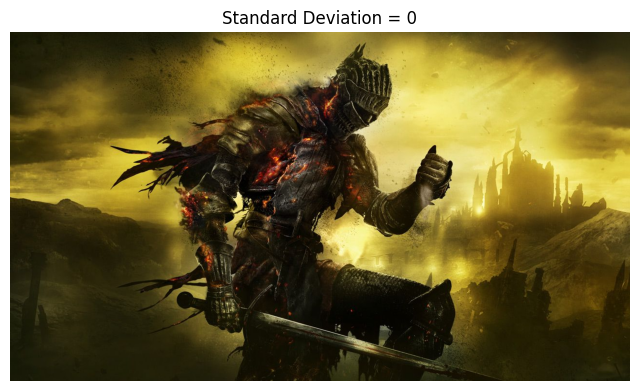

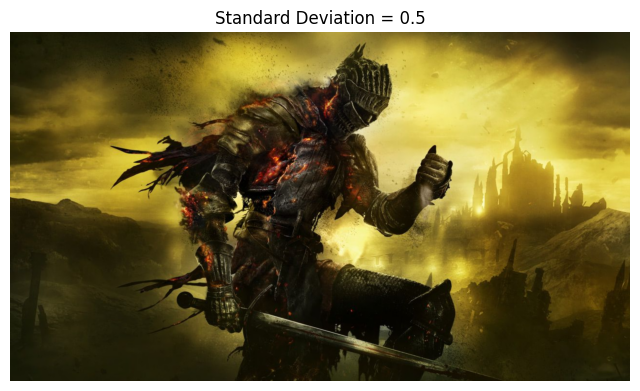

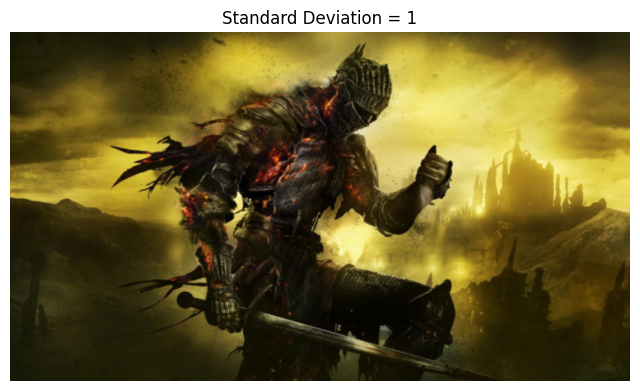

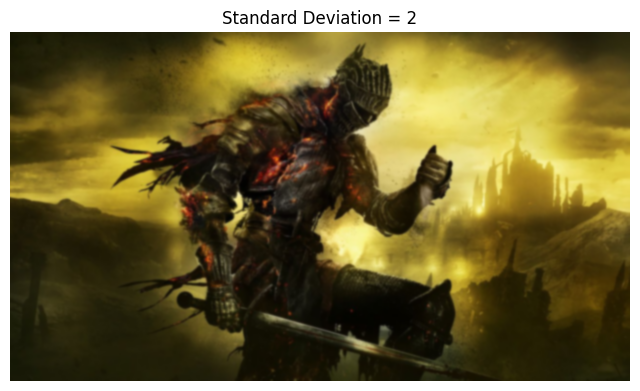

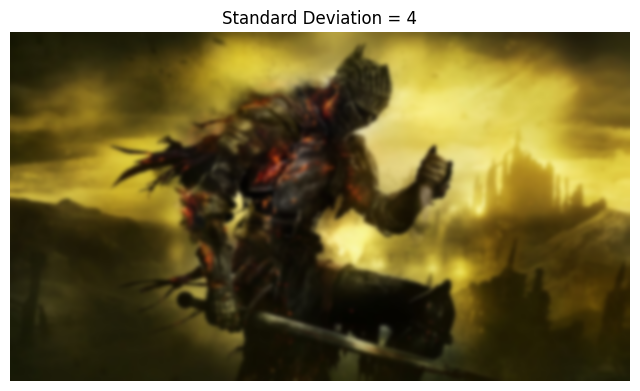

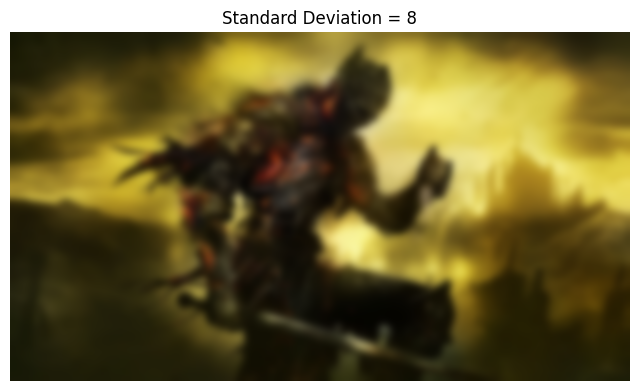

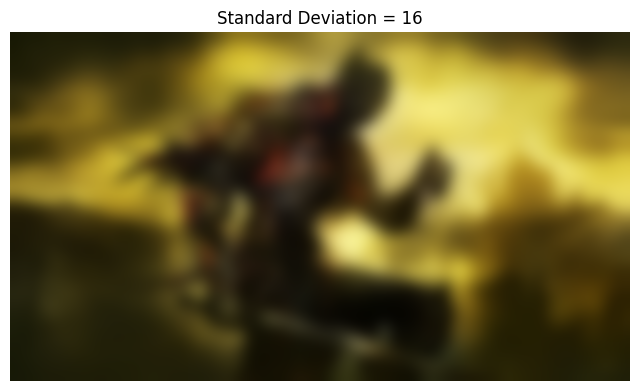

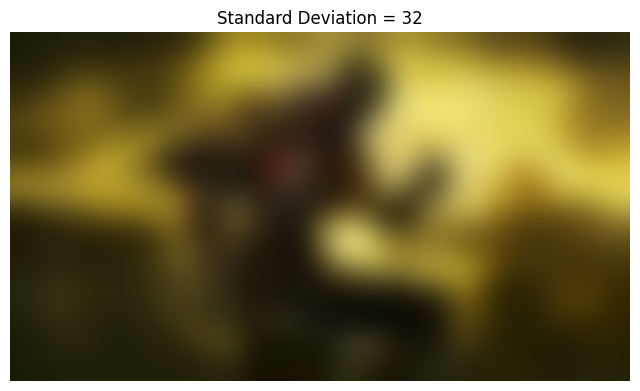

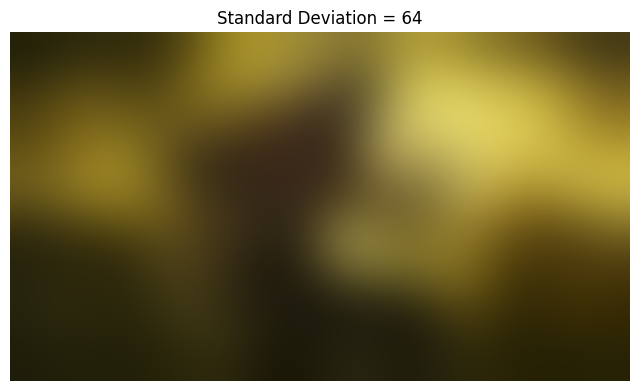

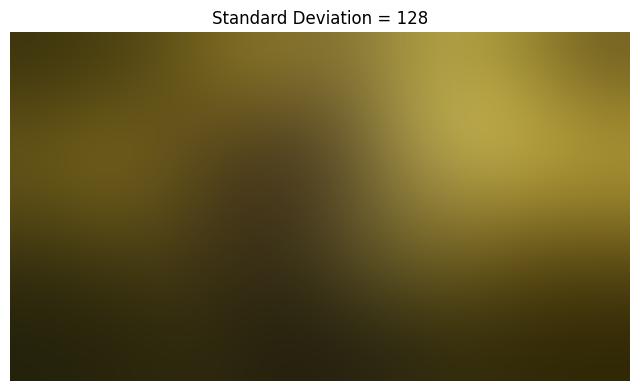

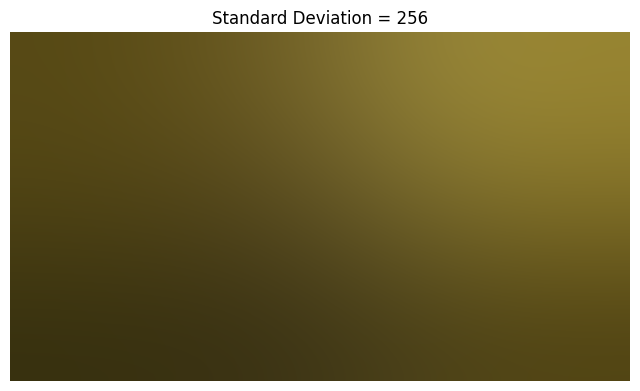

In [90]:
from imageio.v2 import imread
img = imread("p1/ds3.jpg")
### YOUR CODE HERE
std_list = [0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256]
scale_space_rep = scale_space(img, std_list)
### END YOUR CODE
plot_scale_space(scale_space_rep, std_list)

### Problem 1.4 Compare results [1 points]

**Comments on your results:**

----------->YOUR COMMENTS HERE<------------

As we can see the space scale representation retains the original image size while the gaussian pyramid scheme does not. This is the expected behavior

----------->COMMENTS END<------------

## Problem 2: Epipolar Geometry | Uncalibrated Stereo [25 points]

In Assignment 2, we worked with calibrated cameras (i.e., calibration matrices $\mathtt{K}_1$ and $\mathtt{K}_2$, camera rotation matrices $\mathtt{R}_1$ and $\mathtt{R}_2$, camera translation vectors $\boldsymbol{\mathrm{t}}_1$ and $\boldsymbol{\mathrm{t}}_2$) to solve calibrated stereo. 

In this problem, we are interested in recovering the stereo information without the use of a calibration process. Specifically, given point correspondences between a pair of images, your task is to estimate the fundamental matrix and recover the epipolar geometry.

### Problem 2.1 Fundamental matrix [5 points]

Complete the `compute_fundamental` function below using the linear estimation methods described in Lecture 10. Note that the normalization of the corner points is handled in the `fundamental_matrix` function.

**Hint:** Feel free to use `np.linalg.svd` to solve the singular value decomposition. However, read the corresponding documentation to make sure about the form of parameters and returns.

**Note**: The provided function `fundamental_matrix` performs the data normalization. You will complete the function `compute_fundamental` which takes the data normailzed matching points as the input. 

In [3]:
def compute_fundamental(x1, x2):
    """    
    Computes the fundamental matrix from corresponding points using the 8 point algorithm.
    Args:
        x1: normalized homogeneous matching points from image1 (3xN)
        x2: normalized homogeneous matching points from image2 (3xN)
    Returns:
        F: Fundamental Matrix (3x3)
    """
    
    F = np.ones((3,3))
    
    ### YOUR CODE HERE
    N = x1.shape[1]

    # set up the A matrix
    A = np.zeros((N,9))
    for i in range(N):
        u1, v1, w1 = x1[:,i]
        u2, v2, w2 = x2[:,i]
        A[i] = [
            u2*u1, u2*v1, u2*w1,
            v2*u1, v2*v1, v2*w1,
            w2*u1, w2*v1, w2*w1
        ]
    
    # svd A to solve for F
    U, S, Vt = np.linalg.svd(A)

    F = Vt[-1].reshape(3, 3)  # smallest right singular vector
    U2, S2, Vt2 = np.linalg.svd(F)
    S2[-1] = 0.0              # rank-2 constraint
    F = U2 @ np.diag(S2) @ Vt2
    
        
    ### END YOUR CODE
    return F

def fundamental_matrix(x1,x2):
    """    
    Computes the fundamental matrix from corresponding points
    
    Args:
        x1: unnormalized homogeneous points from image1 (3xN)
        x2: unnormalized homogeneous points from image2 (3xN)
        
    Returns:
        Fundamental Matrix (3x3)
    """
        
    n = x1.shape[1]
    if x2.shape[1] != n:
        raise ValueError("Number of points don't match.")

    # normalize image coordinates
    x1 = x1 / x1[2]
    mean_1 = np.mean(x1[:2],axis=1)
    S1 = np.sqrt(2) / np.std(x1[:2])
    T1 = np.array([[S1,0,-S1*mean_1[0]],[0,S1,-S1*mean_1[1]],[0,0,1]])
    x1 = np.dot(T1,x1)
    
    x2 = x2 / x2[2]
    mean_2 = np.mean(x2[:2],axis=1)
    S2 = np.sqrt(2) / np.std(x2[:2])
    T2 = np.array([[S2,0,-S2*mean_2[0]],[0,S2,-S2*mean_2[1]],[0,0,1]])
    x2 = np.dot(T2,x2)

    # compute F with the normalized coordinates
    F = compute_fundamental(x1,x2)

    # reverse normalization
    F = np.dot(T2.T,np.dot(F,T1))
    
    return F

In [6]:
# TEST CODE, DO NOT MODIFY
# Here is the code for you to test your implementation
# Here, we are using only the first 12 correspondences from the dataset, to test our fundamental matrix
cor1 = np.load("./p2/"+'dino'+"/cor1.npy")[:, :12]
cor2 = np.load("./p2/"+'dino'+"/cor2.npy")[:, :12]

F = fundamental_matrix(cor1, cor2)

# For grading purposes only
F = F/np.linalg.norm(F)
print(F/F[2,2])


# should print 
# [[ 4.38486608e-07  3.38940093e-06 -3.13284647e-03]
#  [-2.94668741e-06 -3.49482218e-09  6.44980601e-03]
#  [ 1.61063610e-03 -7.05541767e-03  1.00000000e+00]]

[[ 4.38486608e-07  3.38940093e-06 -3.13284647e-03]
 [-2.94668741e-06 -3.49482218e-09  6.44980601e-03]
 [ 1.61063610e-03 -7.05541767e-03  1.00000000e+00]]


### Problem 2.2 Epipoles [5 points]

In this part, you are supposed to complete the function <code>compute_epipole</code> to calculate the epipoles for a given fundamental matrix.

In [36]:
def compute_epipole(F):
    """
    This function computes the epipoles for a given fundamental matrix.
    
    Args:
      F: fundamental matrix
      
    Returns:
      e1: corresponding epipole in image1
      e2: corresponding epipole in image2
    """
    e1 = np.array([0, 0, 0])
    e2 = np.array([0, 0, 0])
    
    ### YOUR CODE HERE

    U, S, Vt = np.linalg.svd(F)

    # F*e1 = 0, solve for e1
    # print(Vt[-1])
    e1 = Vt[-1]

    # e2^T*F = 0, solve for e2
    e2 = U[:,-1]


    ### END YOUR CODE
    
    return e1,e2

In [16]:
# TEST CODE, DO NOT MODIFY
# Here is the code for you to test your implementation
F_test = np.array([[1, 3, 2], [8, 5, 2], [-4, 6, 2]])

e1,e2 = compute_epipole(F_test)

# For grading purposes only
e1 /= e1[-1]
e2 /= e2[-1]

print(e1)
print(e2)

# should print 
# [-0.03101462 -0.39511829  1. ]
# [-3.1770791   0.90698278  1. ]

[-0.03101462 -0.39511829  1.        ]
[-3.1770791   0.90698278  1.        ]


### Problem 2.3: Epipolar Lines [5 points]

For this part, given pairs of images, your task is to plot the epipolar lines in both images for each image pair. You will complete the function <code>compute_epipolar_lines</code> which computes the homogeneous representation $(a, b, c)^\top$ of the epipolar lines in both images. Use the `fundamental_matrix` function you just got. 
 
The figure below gives you an idea on how the final results look on **dino**. Show your results for **matrix** and **warrior**.
<!--- ![Dino Epipolar](fig/eg_dino_epipolar_lines.png) --->
<!--- The previous results in export to pdf errors on some systems but the following does not --->
<img src="fig/eg_dino_epipolar_lines.png">


In [22]:
def compute_epipolar_lines(F, cor1, cor2):
    """compute the homogeneous representation for the epipolar lines given the fundamental matrix, and corners

    Args:
        F:    Fundamental matrix
        cor1: Corners in homogeneous image coordinates in image 1 (3xN)
        cor2: Corners in homogeneous image coordinates in image 2 (3xN)

    Returns:
        l1:   homogeneous representation of the epipolar lines in image 1 (3xN)
        l2:   homogeneous representation of the epipolar lines in image 2 (3xN)
    """
    
    assert cor1.shape[0] == 3
    assert cor2.shape[0] == 3
    assert cor1.shape == cor2.shape
    
    ### YOUR CODE HERE

    # epipolar constraint: x2^T*F*x1 = 0
    l2 = F @ cor1
    l1 = F.T @ cor2
  
    ### END YOUR CODE

    return l1, l2

In [18]:
# PLOT FUNCTION: DO NOT CHANGE
def plot_epipolar_lines(img1, img2, F, cor1, cor2):
    """Plot epipolar lines on image given image, corners

    Args:
        img1: Image 1.
        img2: Image 2.
        F:    Fundamental matrix
        cor1: Corners in homogeneous image coordinates in image 1 (3xN)
        cor2: Corners in homogeneous image coordinates in image 2 (3xN)
    """
    
    if img1.shape[0] != img2.shape[0]:
        if img1.shape[0] > img2.shape[0]:
            new_img2 = np.zeros((img1.shape[0], img2.shape[1], img2.shape[2]), dtype=img2.dtype)
            new_img2[:img2.shape[0],:,:] = img2
            img2 = new_img2
        else:
            new_img1 = np.zeros((img2.shape[0], img1.shape[1], img1.shape[2]), dtype=img1.dtype)
            new_img1[:img1.shape[0],:,:] = img1
            img1 = new_img1
            

    assert cor1.shape[0] == 3
    assert cor2.shape[0] == 3
    assert cor1.shape == cor2.shape
    
    l1, l2 = compute_epipolar_lines(F, cor1, cor2)
    # Plot epipolar lines in the first image
    # There is an epipolar line for each corner
    fig = plt.figure(figsize=(20, 8))
    plt.subplots_adjust(left=0.15, right=0.85, wspace=0.1)
    
    plt.subplot(1, 2, 1)
    plt.imshow(img1, cmap='gray')
    h, w = img1.shape[:2]
    for l in l1.T:
        a, b, c = l # ax + by + c = 0, y = -a/b * x - c/b
        x = np.arange(w)
        y = (-a / b) * x - (c / b)
        x = np.array([x[i] for i in range(x.size) if y[i] >=0 and y[i] < h - 1])
        y = np.array([y[i] for i in range(y.size) if y[i] >=0 and y[i] < h - 1])
        plt.plot(x, y, 'b', zorder=1)
    plt.scatter(cor1[0], cor1[1], s=50, edgecolors='b', facecolors='r', zorder=2)
    
    # Plot epipolar lines in the second image
    plt.subplot(1, 2, 2)
    plt.imshow(img2, cmap='gray')
    h, w = img2.shape[:2]
    for l in l2.T:
        a, b, c = l
        x = np.arange(w)
        y = (-a / b) * x - (c / b)
        x = np.array([x[i] for i in range(x.size) if y[i] >=0 and y[i] < h - 1])
        y = np.array([y[i] for i in range(y.size) if y[i] >=0 and y[i] < h - 1])
        plt.plot(x, y, 'b', zorder=1)
        plt.scatter(cor2[0], cor2[1], s=50, edgecolors='b', facecolors='r', zorder=2)
    plt.show()

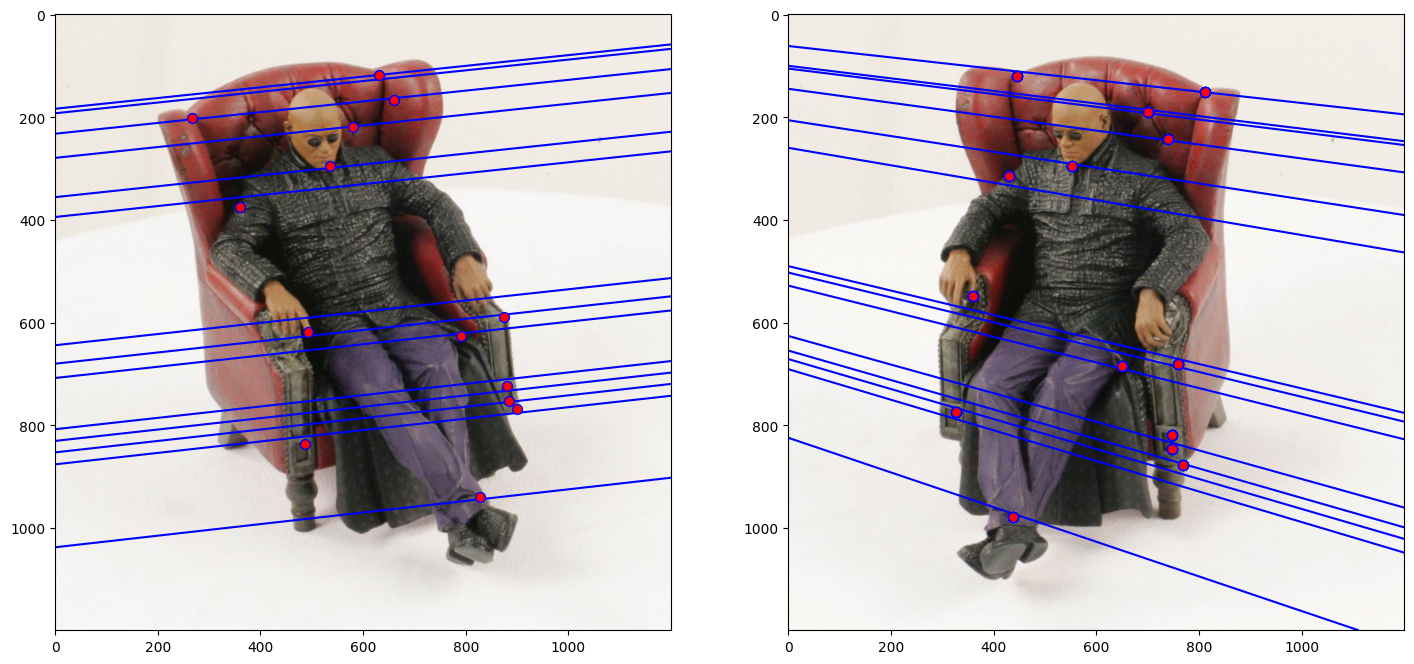

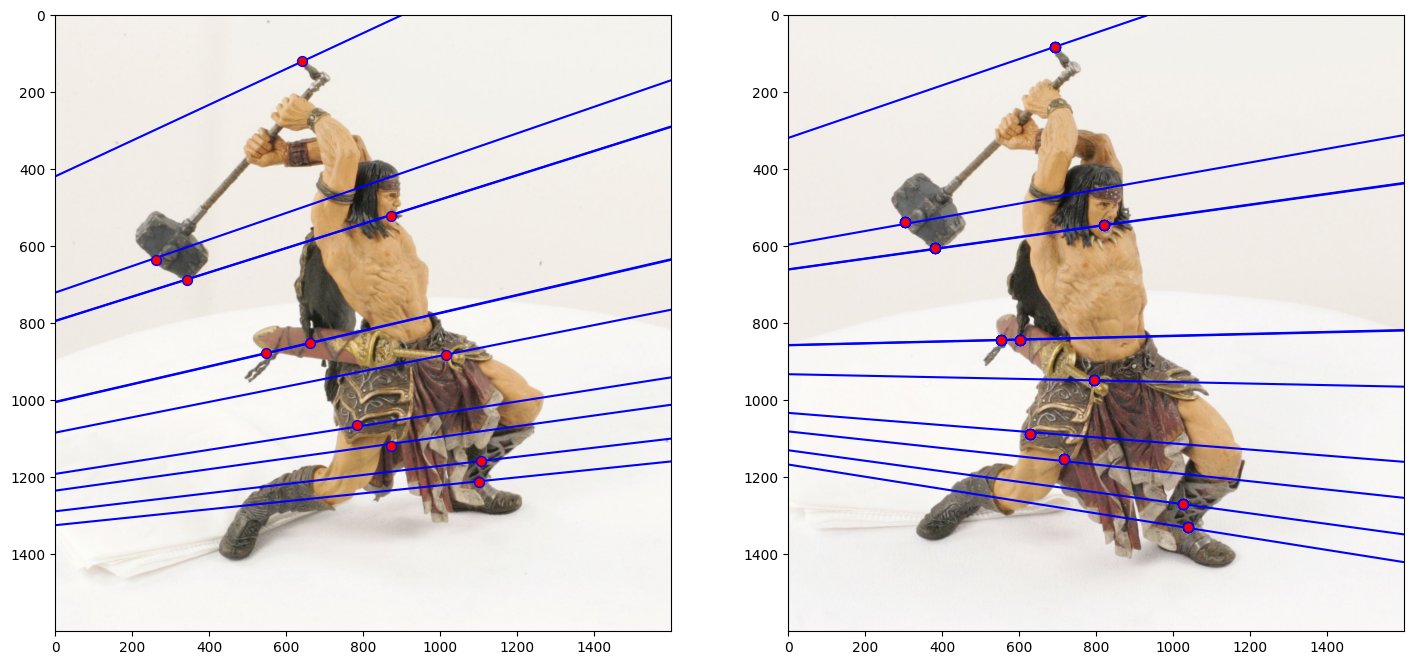

In [23]:
# PLOT CODE: DO NOT CHANGE
# This code is for you to plot the results. 
# The total number of outputs is 4 images in 2 pairs

imgids = ["matrix", "warrior"]
for imgid in imgids:
    I1 = imread("./p2/"+imgid+"/"+imgid+"0.png")
    I2 = imread("./p2/"+imgid+"/"+imgid+"1.png")
    cor1 = np.load("./p2/"+imgid+"/cor1.npy")
    cor2 = np.load("./p2/"+imgid+"/cor2.npy")
    F = fundamental_matrix(cor1, cor2)
    plot_epipolar_lines(I1,I2,F,cor1,cor2)

### Problem 2.4: Uncalibrated Stereo Image Rectification [10 points]

In Assignment 2, you performed epipolar rectification with calibrated stereo cameras. Rectifying a pair of images can also be done for uncalibrated camera images. Using the fundamental matrix we can find the pair of epipolar lines $\boldsymbol{\mathrm{l}}_i$ and $\boldsymbol{\mathrm{l}}^\prime_i$ for each of the correspondences. All epipolar lines in image 1 intersect at the  epipole $\boldsymbol{\mathrm{e}}$ and all epipolar lines in image 2 intersect at the epipole $\boldsymbol{\mathrm{e}}'$. Now to make the epipolar lines to be parallel we need to map the epipoles to infinity. Hence, we need to find a homography that maps the epipoles to infinity.
 
The rectificaton method has already been implemented for you. You can get more details from the paper *Theory and Practice of Projective Rectification* by Richard Hartley.

Your task is to:

1) complete the `warp_image` function (**Hint:** You may reuse some of the codes from Assignment 2, this time we perform the warp of the full image content. The size of the output image is bounded by the **bounding box**, which means 4 corners of the original image are all inside the output image).

2) complete the `image_rectification` function to find the rectified images. Use the provided `compute_matching_homographies` to compute the rectification transformation matrices.

3) plot the parallel epipolar lines using the `plot_epipolar_lines` function from above.

The figure below gives you an idea on how the final results look (Note that the two images may not be in the same shape). Show your result for **matrix** and **warrior**.
<!--- ![House Rectification](fig/exp_house_rectify.png) --->
<!--- The previous results in export to pdf errors on some systems but the following does not --->
<img src="fig/exp_house_rectify.png">


In [25]:
from math import floor, ceil

def warp_image(image, H):
    """
    Performs the warp of the full image content.
    Calculates bounding box by piping four corners through the transformation.
    
    Args: 
    image: Image to warp
    H: The image rectification transformation matrices.
    
    Returns:
    Out: An inverse warp of the image, given a homography.
    min_x, min_y: The minimum of warped image bound.
    """
    ### YOUR CODE HERE

    Hi,Wi = image.shape[:2]

    LT = np.array([0, 0, 1])
    LB = np.array([0, Hi-1, 1])
    RT = np.array([Wi-1, 0, 1])
    RB = np.array([Wi-1, Hi-1, 1])

    # apply forward method to the corners to get the bounding box 
    LT_ = np.dot(H, LT)
    LT_ = LT_ / LT_[2]
    LB_ = np.dot(H, LB)
    LB_ = LB_ / LB_[2]
    RT_ = np.dot(H, RT)
    RT_ = RT_ / RT_[2]
    RB_ = np.dot(H, RB)
    RB_ = RB_ / RB_[2]

    # compute bounding box
    min_x = int(np.floor(min(LT_[0], LB_[0], RT_[0], RB_[0])))
    min_y = int(np.floor(min(LT_[1], LB_[1], RT_[1], RB_[1])))
    max_x = int(np.ceil(max(LT_[0], LB_[0], RT_[0], RB_[0])))
    max_y = int(np.ceil(max(LT_[1], LB_[1], RT_[1], RB_[1])))


    out_width = max_x - min_x + 1
    out_height = max_y - min_y + 1

    # out = H^-1 @ img
    # have to go pixel by pixel bc its coordinates
    H_inv = np.linalg.inv(H)
    out = np.zeros((out_height, out_width, image.shape[2]), dtype=image.dtype)

    for i in range(out_height):
        for j in range(out_width):
            # apply H^-1 to the pixel coordinates
            # needs to be in homogeneous coordinates
            src_coords = np.dot(H_inv, np.array([j, i, 1]))
            # convert back to inhomogeneous coordinates
            src_coords = src_coords / src_coords[2]
            x = src_coords[0]
            y = src_coords[1]

            # nearest neighbor
            x_nn = int(round(x))
            y_nn = int(round(y))

            if 0 <= x_nn < image.shape[1] and 0 <= y_nn < image.shape[0]:
                out[i, j] = image[y_nn, x_nn]



    print("min_x, min_y, max_x, max_y", min_x, min_y, max_x, max_y)
    print("out.shape", out.shape)
    print("image.shape", image.shape)

    ### END YOUR CODE
    
    return out, min_x, min_y

In [26]:
def compute_matching_homographies(e2, F, im2, points1, points2):
    """This function computes the homographies to get the rectified images.
    
    Args: 
    e2: epipole in image 2
    F: the fundamental matrix
    im2: image2
    points1: corner points in image1
    points2: corresponding corner points in image2
    
    Returns:
    H1: homography for image 1
    H2: homography for image 2
    """
    # calculate H2
    width = im2.shape[1]
    height = im2.shape[0]

    T = np.identity(3)
    T[0][2] = -1.0 * width / 2
    T[1][2] = -1.0 * height / 2

    e2hat = T.dot(e2) 

    norm_v = np.linalg.norm(e2hat[:2])
    cos_theta = e2hat[0] / norm_v
    sin_theta = e2hat[1] / norm_v

    if cos_theta < 0:
        cos_theta = -cos_theta
        sin_theta = -sin_theta

    R = np.array([[cos_theta, sin_theta, 0],
                  [-sin_theta, cos_theta, 0],
                  [0, 0, 1]])

    G = np.identity(3)
    G[2, 0] = -e2hat[2] / (e2hat[0] * cos_theta + e2hat[1] * sin_theta)

    H2 = np.dot(np.dot(G, R), T)
    
    
    # calculate H1
    e_prime = np.zeros((3, 3))
    e_prime[0][1] = -e2[2]
    e_prime[0][2] = e2[1]
    e_prime[1][0] = e2[2]
    e_prime[1][2] = -e2[0]
    e_prime[2][0] = -e2[1]
    e_prime[2][1] = e2[0]

    v = np.array([1, 1, 1])
    M = e_prime.dot(F) + np.outer(e2, v)

    points1_hat = H2.dot(M.dot(points1.T)).T
    points2_hat = H2.dot(points2.T).T

    W = points1_hat / points1_hat[:, 2].reshape(-1, 1)
    b = (points2_hat / points2_hat[:, 2].reshape(-1, 1))[:, 0]

    # least square problem
    a1, a2, a3 = np.linalg.lstsq(W, b, rcond=None)[0]
    HA = np.identity(3)
    HA[0] = np.array([a1, a2, a3])

    H1 = HA.dot(H2).dot(M)
    return H1, H2

In [41]:
def image_rectification(im1, im2, points1, points2):
    """This function returns the rectified images along with the new corner points as
    images with corner correspondences
    
    Args:
    im1: image1
    im2: image2
    points1: corner points in image1
    points2: corner points in image2
    
    Returns:
    rectified_im1: rectified image 1
    rectified_im2: rectified image 2
    new_cor1: new corners in the rectified image 1
    new_cor2: new corners in the rectified image 2
    """
    ### YOUR CODE HERE
    F = fundamental_matrix(points1, points2)
    e1, e2 = compute_epipole(F)
    H1, H2 = compute_matching_homographies(e2, F, im2, points1.T, points2.T)

    # warp images 
    rectified_im1, min_x1, min_y1 = warp_image(im1, H1)
    rectified_im2, min_x2, min_y2 = warp_image(im2, H2)
    
    # transform and normalize points (3xN)
    new_cor1 = H1 @ points1
    new_cor1 /= new_cor1[-1, :]
    new_cor1[0, :] -= min_x1
    new_cor1[1, :] -= min_y1

    new_cor2 = H2 @ points2
    new_cor2 /= new_cor2[-1, :]
    new_cor2[0, :] -= min_x2
    new_cor2[1, :] -= min_y2
    
    ### END YOUR CODE
    return rectified_im1, rectified_im2, new_cor1, new_cor2

./p2/matrix/matrix0.png
min_x, min_y, max_x, max_y -864 -662 675 726
out.shape (1389, 1540, 3)
image.shape (1200, 1200, 3)
min_x, min_y, max_x, max_y -874 -648 611 808
out.shape (1457, 1486, 3)
image.shape (1200, 1200, 3)


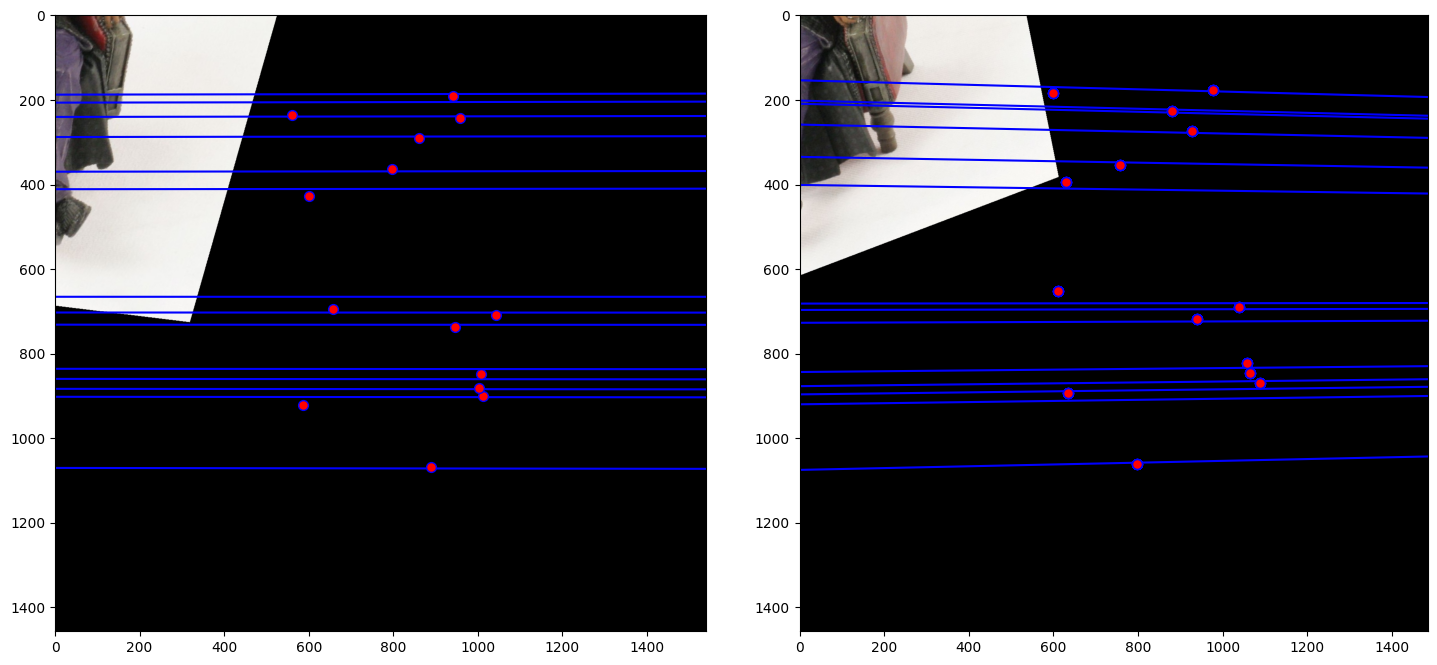

./p2/warrior/warrior0.png


KeyboardInterrupt: 

In [42]:
# This code is for you to plot the results. 
# The total number of outputs is 4 images in 2 pairs

imgids = ["matrix", "warrior"]
for imgid in imgids:
    print("./p2/"+imgid+"/"+imgid+"0.png")
    I1 = imread("./p2/"+imgid+"/"+imgid+"0.png")
    I2 = imread("./p2/"+imgid+"/"+imgid+"1.png")
    
    cor1 = np.load("./p2/"+imgid+"/cor1.npy")
    cor2 = np.load("./p2/"+imgid+"/cor2.npy")
    
    rectified_im1, rectified_im2, rect_cor1, rect_cor2 = image_rectification(I1, I2, cor1, cor2)
    rect_F = fundamental_matrix(rect_cor1, rect_cor2)
    plot_epipolar_lines(rectified_im1, rectified_im2, rect_F, rect_cor1, rect_cor2)

## Problem 3: Fundamental Matrix Estimation with RANSAC [30 pts]

In problem 2, you have `fundamental_matrix` function which calculates the fundamental matrix $\mathtt{F}$ given matching pairs of points in two different images. In this problem, we will first implement a SIFT (Scale-Invariant Feature Transform)-pipeline that detects feature points and identifies matching points between two images. Then we estimate the fundamental matrix $\mathtt{F}$ with those matching points using RANSAC method.

**Instruction:** You can use basic functions/objects in OpenCV, but you **may not use** functions that directly solve the problem unless specified.

### Problem 3.1: SIFT Feature Detection [5 pts]

Let's get some experience with SIFT detection. You may refer to [SIFT Python tutorial](https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html) and OpenCV [cv::SIFT Class Reference](https://docs.opencv.org/4.x/d7/d60/classcv_1_1SIFT.html) according to your OpenCV version. For more details and understanding, reading [the original paper](https://www.cs.ubc.ca/~lowe/papers/ijcv04.pdf) is highly recommended. 

The following example plots keypoints on `p2/dino/dino0.png`. Your task is to plot a similar image for `p2/dino/dino1.png`.
<center><img src="fig/eg_dino_sift.png" alt="DINO SIFT" width="400" align="center"/></center>

For this part ONLY (Problem 3.1), you can use any OpenCV functions you need.

In [ ]:
import cv2
def get_sift_features_plot(image):
    """This function draws SIFT features.
    Follow the SIFT Python tutorial
    
    Args:
    image:rgb image
    
    Returns:
    keypoint_image: image with key points drawn on
    """
    keypoint_image = image.copy()
        
    ### YOUR CODE HERE 
  
    ### END YOUR CODE
    
    return keypoint_image

In [ ]:
# PLOT CODE: DO NOT CHANGE
# This code is for you to plot the results. 
image = imread('p2/dino/dino1.png')
keypointimage = get_sift_features_plot(image)
plt.imshow(keypointimage)
plt.show()

### Problem 3.2: SIFT Feature Matching [10 pts]

Let's try to match the SIFT features from a pair of images. You will be using [cv::BFMatcher](https://docs.opencv.org/4.x/d3/da1/classcv_1_1BFMatcher.html), a Brute-force descriptor matcher in OpenCV. Also, we will draw lines between the features that match in both the images like you did in Assignment 2. However, you will use [OpenCV Drawing Functions](https://docs.opencv.org/4.x/d6/d6e/group__imgproc__draw.html) this time.
Complete the `get_matches_sift` and `create_matching_image` functions to draw a pair of matched images. The following example plots the result for **dino**, your task is to plot the result for **skull-book**.


<!--- ![DINO MATCHING](fig/eg_dino_sift_matching.png) --->
<!--- The previous results in export to pdf errors on some systems but the following does not --->
<img src="fig/eg_dino_sift_matching.png">


For this part (Problem 3.2), you will use `cv::BFMatcher` and `cv::SIFT` related modules from OpenCV library. See the [Feature Matching Tutorial](https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html) for reference.

Sort the descriptors in the order of their distance and draw **the first 50 matching pairs**.

In [ ]:
def get_matches_sift(img1, img2):
    """This function detects matching points from a pair of images
        using SIFT feature detection and Brute force descriptor matcher.
    Args:
        img1: Grayscale image1
        img2: Grayscale image2
    Returns:
        corners1: numpy array that contains matching corners from image1 in image coordinates (Nx2)
        corners2: numpy array that contains matching corners from image2 in image coordinates (Nx2)
    """

    ### YOUR CODE HERE     
   
    ### END YOUR CODE
    
    return corners1, corners2

def create_matching_image(img1, img2, corners1, corners2, num_match):
    """This function create a matching result image from a pair of images
       and their correspondences.
    Args:
        img1: rgb image1
        img2: rgb image2
        corners1: matching points in image1 in image coordinates (Nx2)
        corners2: matching points in image2 in image coordinates (Nx2)
        num_match: Total number of matching pairs to be drawn.
    Returns:
        matching_img: the result rgb matching image. 
    """
    
    h1, w1, _ = img1.shape
    h2, w2, _ = img2.shape
    height = max(h1, h2)
    width = w1+w2
    matching_img = np.zeros((height, width, 3), dtype=img1.dtype)
    
    ### YOUR CODE HERE 
  
    ### END YOUR CODE

    return matching_img

In [ ]:
# PLOT CODE: DO NOT CHANGE
# This code is for you to plot the results. 

# read images
img1 = imread('p3/skull-book1.jpg')  
img2 = imread('p3/skull-book2.jpg') 

corners1, corners2 = get_matches_sift(cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY),\
                                      cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY))

print('Found {:d} possibly matching features'.format(corners1.shape[0]))
match_image = create_matching_image(img1, img2, corners1, corners2, 50)
plt.figure(figsize=(16,8));plt.imshow(match_image); 
plt.show()

### Problem 3.3: Calculate the Fundamental Matrix using RANSAC [15 pts]

Now you have `fundamental_matrix` function which calculates the fundamental matrix $\mathtt{F}$ and a set of potential matching points using SIFT and BFMatcher. However, as you see from Problem 3.2, unlike the Problem 2, the SIFT-pipeline doesn't guarantee that those points are perfectly matched. Therefore, we will implement the RANdom SAmple Consensus (RANSAC) method from the lecture to search through the potential matching points and remove those false-matches (outliers) to use for calculating the fundamental matrix.

Complete `fundamental_matrix_ransac` to estimate fundamental matrix with RANSAC method. You will implement `compute_consensus_set` as a building block to find a consensus set. You will also complete functions to calculate distance as squared distance of points to epipolar line (`point2line_sqr_dist`).

In [ ]:
def to_homog(points):
    """convert points from euclidean to homogeneous
    """
    m, n = points.shape
    homo_points = np.vstack((points, np.ones(n)))
    return homo_points

def point2line_sqr_dist(point, line):
    """This function provides distance of point to (epipolar) line
    Args:
        point: 2D homogeneous point
        line: (a,b,c) for ax+by+c=0
    Returns:
        distance: squared distance of point to line
    """
    ### YOUR CODE HERE
   
    ### END YOUR CODE 
    return distance

def compute_consensus_set(x1, x2, F, threshold):
    """This function find consensus set of points for current F
    Args:
        x1: homogeneous points from image1 (3xN)
        x2: homogeneous points from image2 (3xN)
        F: fundamental matrix
        threshold: the maximum distance allowed for a correspondence
    Returns:
        inliers: numpy array that contains indices of the inliers in x1 and x2

        We only keep points that satisfy `dist1 + dist2 <= threshold`,
        where dist1 and dist2 are the squared distances from the points to their
        corresponding epipolar lines.
    """
    inliers = []
    
    ### YOUR CODE HERE            
   
    ### END YOUR CODE        
    return np.array(inliers)  
    
def compute_N(p, s, inlier_p):
    if inlier_p>0.99:
        return 0
    return int(np.log(1 - p) / np.log(1 - inlier_p ** s))

In [ ]:
def fundamental_matrix_ransac(x1, x2, threshold=100, confidence=0.95, iter_limit=5000):
    """    
    Computes the fundamental matrix with RANSAC
    Use RANSAC to find the best fundamental matrix by randomly sampling interest points. 
    (Note: Do not sample the same point multiple times in a single iteration)
    Args:
        x1: possibly matching points from image1 (2xN)
        x2: possibly matching points from image2 (2xN)
        threshold: distance threshold
        confidence: confidence value, 0.95 by default
        iter_limit: maximum iterations to force running stop
        
    Returns:
        best_F: the best Fundamental Matrix (3x3)
        x1_inliers: A numpy array (2xM) representing the true match points (inliers)
                    from the image1 with respect to best_F
        x2_inliers: A numpy array (2xM) representing the true match points (inliers)
                    from the image2 with respect to best_F        
    """
    ### YOUR CODE HERE    
   
    ### END YOUR CODE 
    return best_F, x1_inliers, x2_inliers

First, test your implementation on **matrix** with ground truth matches. The two pairs of images 1) the matching pair with $\mathtt{F}$ estimated from the whole set set of corners and 2) the matching pair with $\mathtt{F}$ estimated with RANSAC method. The two matching pairs should look very similar.

In [ ]:
# PLOT CODE: DO NOT CHANGE
# This code is for you to plot the results. 

imgids = ["matrix"]
for imgid in imgids:
    print("./p2/"+imgid+"/"+imgid+"0.png")
    I1 = imread("./p2/"+imgid+"/"+imgid+"0.png")
    I2 = imread("./p2/"+imgid+"/"+imgid+"1.png")
    
    cor1 = np.load("./p2/"+imgid+"/cor1.npy")
    cor2 = np.load("./p2/"+imgid+"/cor2.npy")
    
    print('Found {:d} possibly matching features'.format(cor1.shape[1]))
    
    match_image_all = create_matching_image(I1, I2, cor1.T, cor2.T, cor1.shape[1])
    
    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1); plt.imshow(match_image_all);

    F, x1_in, x2_in = fundamental_matrix_ransac(cor1[:2,:], cor2[:2,:])
    match_image = create_matching_image(I1, I2, x1_in.T, x2_in.T, x1_in.shape[1])
    print('\n\t\t\tF estimated with whole set of points\t\t\t\t\t\t\t\t F estimated with RANSAC')
    
    plt.subplot(1,2,2); plt.imshow(match_image); plt.show()   


Then, show your results for **skull-book**. You can tweak the parameters to `fundamental_matrix_ransac` to optimize your results. 

In [ ]:
# PLOT CODE: DO NOT CHANGE
# This code is for you to plot the results.  

def plot_matching_origin(I1, I2, corners1, corners2,num_match):
    match_image_all = create_matching_image(I1, I2, corners1, corners2, num_match)
    print('\n F estimated with whole set of points')
    plt.figure(figsize=(16,8)); plt.imshow(match_image_all)

def plot_matching_RANSAC(I1, I2, corners1, corners2, thresh, num_match):
    F, x1_in, x2_in = fundamental_matrix_ransac(corners1.T, corners2.T, threshold=thresh)
    match_image = create_matching_image(I1, I2, x1_in.T, x2_in.T, num_match)
    print('F estimated with RANSAC, Dist threshold='+str(thresh))
    plt.figure(figsize=(16,8)); plt.imshow(match_image);

In [ ]:
# LOAD CODE: DO NOT MODIFY
I1 = imread("./p3/skull-book1.jpg");scale_a=0.5
I2 = imread("./p3/skull-book2.jpg");scale_b=0.5

I1 = cv2.resize(I1, \
                (int(I1.shape[1] * scale_a), int(I1.shape[0] * scale_a)),\
                interpolation = cv2.INTER_AREA)
I2 = cv2.resize(I2, \
                (int(I2.shape[1] * scale_b), int(I2.shape[0] * scale_b)),\
                interpolation = cv2.INTER_AREA)

corners1, corners2 = get_matches_sift(cv2.cvtColor(I1, cv2.COLOR_RGB2GRAY),\
                                  cv2.cvtColor(I2, cv2.COLOR_RGB2GRAY))
print('Found {:d} possibly matching features'.format(corners1.shape[0]))

In [ ]:
# PLOT CODE: DO NOT MODIFY
plot_matching_origin(I1, I2, corners1, corners2, 50)
plt.show()

In [ ]:
thresh = 20 #You can tweak this

#PLOT CODE: DO NOT MODIFY
plot_matching_RANSAC(I1, I2, corners1, corners2, thresh, 50)
plt.show()

Using the SIFT and RANSAC functions that you have implemented, plot all the epipolar lines and corners for both images using `plot_epipolar_lines`. Use `threshold = 5` for this question. (There will be a lot of points and lines)

In [ ]:
I1 = imread("./p3/skull-book1.jpg");scale_a=0.5
I2 = imread("./p3/skull-book2.jpg");scale_b=0.5

I1 = cv2.resize(I1, \
                (int(I1.shape[1] * scale_a), int(I1.shape[0] * scale_a)),\
                interpolation = cv2.INTER_AREA)
I2 = cv2.resize(I2, \
                (int(I2.shape[1] * scale_b), int(I2.shape[0] * scale_b)),\
                interpolation = cv2.INTER_AREA)

### YOUR CODE HERE

### END YOUR CODE

## Problem 4: Optical Flow [10 pts]

In this problem, we will implement the Lucas-Kanade algorithm to estimate optical flow.

An example input contains two images: 
<!--- ![title](fig/sample_optical_flow_input.png) --->
<!--- The previous results in export to pdf errors on some systems but the following does not --->
<img src="fig/sample_optical_flow_input.png">

The corresponding optical flow output is shown below - this is not a solution, just an example output.

<!--- ![title](fig/sample_optical_flow_output.PNG) --->
<!--- The previous results in export to pdf errors on some systems but the following does not --->
<img src="fig/sample_optical_flow_output.PNG">

### Problem 4.1: Lucas-Kanade implementation [10 pts]

Implement the Lucas-Kanade method for estimating optical ﬂow. Fill in the function `compute_LK`.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def grayscale(img):
    '''
    Converts RGB image to Grayscale
    '''
    gray=np.zeros((img.shape[0],img.shape[1]))
    gray=img[:,:,0]*0.21263903 + img[:,:,1]*0.71516871 + img[:,:,2]*0.072192319 # sRGB
    return gray

def plot_optical_flow(img,U,V,titleStr):
    '''
    Plots optical flow given U,V and one of the images
    '''
    
    # Change t if required, affects the number of arrows
    # t should be between 1 and min(U.shape[0],U.shape[1])
    t=10 
    
    # Subsample U and V to get visually pleasing output
    U1 = U[::t,::t]
    V1 = V[::t,::t]
    
    # Create meshgrid of subsampled coordinates
    r, c = img.shape[0],img.shape[1]
    cols,rows = np.meshgrid(np.linspace(0,c-1,c), np.linspace(0,r-1,r))
    cols = cols[::t,::t]
    rows = rows[::t,::t]
    
    # Plot optical flow
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    plt.quiver(cols,rows,U1,-V1)
    plt.title(titleStr)
    plt.show()


In [ ]:
images=[]
for i in range(1,5):
    # each image after converting to gray scale is of size -> 400x288
    images.append(plt.imread('p4/im'+str(i)+'.png')[:,:288,:])

In [ ]:
# computes simple Lucas-Kanade Optical Flow
def compute_LK(img1, img2, window, u_prev=None, v_prev=None):
    """
    img1 - grayscale image 1 (HxW)
    img2 - grayscale image 2 (HxW)
    window - size of the window (integer)
    
    """
           
    if(u_prev is None):
        u_prev = np.zeros(img1.shape)
        v_prev = np.zeros(img1.shape)
        
    h, w = img1.shape
    image = img1
    U = np.zeros((h,w))
    V = np.zeros((h,w))
    assert img2.shape == (h,w)
    
    ### YOUR CODE HERE 
   
    ### END YOUR CODE
    #         
    return U, V

In [ ]:
# PLOT CODE: DO NOT MODIFY
## Test your implementation on sample parameter values
plt.figure(figsize=(10,10))
plt.imshow(images[0], alpha=0.5)
plt.imshow(images[1], alpha=0.5)
plt.title('Overlayed Images')
plt.show()

window = 45
U, V = compute_LK(grayscale(images[0]),grayscale(images[1]), window)
# Plot
plot_optical_flow(images[0],U,V, 'window = '+str(window))

**Test with different Window size**, and **comment on** your results.

Plot optical ﬂow for the pair of images im1 and im2 for the given 4 different window sizes, which leads to an observable difference in the results. Comment on the effect of window size on results and justify.

In [ ]:
windows=[15, 25, 35, 55]

for i in range(4):
    U,V=compute_LK(grayscale(images[0]),grayscale(images[1]),windows[i])
    plot_optical_flow(images[0],U,V,'window size='+str(windows[i]))

**Comments on your results:**

----------->YOUR COMMENTS HERE<------------


----------->COMMENTS END<------------

### Problem 4.2: Multi-resolution Lucas-Kanade implementation [Optional] [0 pts]

**NOTE: This problem is optional. Your submission for this problem would be graded but you would not receive a score for solving this problem. However, you are welcome and encouraged to try it out and bring any questions that you have to the instructional team.**


Implement the Lucas-Kanade method for estimating optical flow. The function `LucasKanadeMultiScale` needs to be completed. You can implement `upsample_flow` and `OpticalFlowRefine` as 2 building blocks in order to complete this.

In [ ]:
# you can use interpolate from scipy
# You can implement 'upsample_flow' and 'OpticalFlowRefine' 
# as 2 building blocks in order to complete this.
from skimage.transform import resize

def upsample_flow(u_prev, v_prev):
    ''' You may implement this method to upsample optical flow from previous level
    Args:
        u_prev, v_prev: optical flow from prev level
    Returns:
        u, v: upsampled optical flow to the current level
    '''
    """ ==========
    YOUR CODE HERE
    ========== """
    
    
    return u, v

def OpticalFlowRefine(im1,im2,window, u_prev=None, v_prev=None):
    '''
    Inputs: the two images at current level and window size
    u_prev, v_prev - previous levels optical flow
    Return u,v - optical flow at current level
    '''   
    """ ==========
    YOUR CODE HERE
    ========== """
    
   
    
    return u, v

In [ ]:
def gaussian2d(sig):
    """
    Creates 2D Gaussian kernel with a sigma of `sig`.
    """
    filter_size = int(sig * 6)
    if filter_size % 2 == 0:
        filter_size += 1
        
    ax = np.arange(-filter_size // 2 + 1., filter_size // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))
    return kernel / np.sum(kernel)

def LucasKanadeMultiScale(im1,im2,window, numLevels=2):
    '''
    Implement the multi-resolution Lucas kanade algorithm
    Inputs: the two images, window size and number of levels
    if numLevels = 1, then compute optical flow at only the given image level.
    Returns: u, v - the optical flow
    '''
    
    """ ==========
    YOUR CODE HERE
    ========== """
    # You can call OpticalFlowRefine iteratively
    
    
    
    return u, v

In [ ]:
numLevels = 5
window = 13
U, V = LucasKanadeMultiScale(grayscale(images[0]),grayscale(images[1]),\
                          window,numLevels)
# # Plot
plot_optical_flow(images[0],U,V, \
                  'levels = ' + str(numLevels) + ', window = '+str(window))

#### Problem 4.2.2: Number of levels

Plot optical flow for the pair of images im1 and im2 for different number of levels mentioned below. Comment on the results and justify.<br>
(i) window size = 13, numLevels = 1<br>
(ii) window size = 13, numLevels = 3<br>
(iii) window size = 13, numLevels = 5<br>
So, you are expected to provide 3 outputs here<br>

Note: if numLevels = 1, then it means the optical flow is only computed at the image resolution i.e. no downsampling

In [ ]:
# Example code to generate output
numLevels=1
U,V=LucasKanadeMultiScale(grayscale(images[0]),grayscale(images[1]),\
                          window,numLevels)
plot_optical_flow(images[0],U,V, \
                  'levels = ' + str(numLevels) + ', window = '+str(window))

numLevels=3
U,V=LucasKanadeMultiScale(grayscale(images[0]),grayscale(images[1]),\
                          window,numLevels)
# Plot
plot_optical_flow(images[0],U,V, \
                  'levels = ' + str(numLevels) + ', window = '+str(window))

numLevels=5
U,V=LucasKanadeMultiScale(grayscale(images[0]),grayscale(images[1]),\
                          window,numLevels)
# Plot
plot_optical_flow(images[0],U,V, \
                  'levels = ' + str(numLevels) + ', window = '+str(window))

**Your comments here**

#### Problem 4.2.3: Window size

Plot optical flow for the pair of images im1 and im2 for at least 3 different window sizes which leads to observable difference in the results. Comment on the effect of window size on results and justify. For this part fix the number of levels to be 3.

In [ ]:
# Example code, change as required
numLevels=3

w1, w2, w3 = 7, 11, 15
for window in [w1, w2, w3]:
    U,V=LucasKanadeMultiScale(grayscale(images[0]),grayscale(images[1]),\
                              window,numLevels)
    plot_optical_flow(images[0],U,V, \
                      'levels = ' + str(numLevels) + ', window = '+str(window))

**Your comments here**

#### Problem 4.2.4 All pairs

Find optical ﬂow for the pairs (im1,im2), (im1,im3), (im1,im4) for a range of window sizes. Submit the best result for each pair. Does the optical ﬂow result seem consistent with visual inspection? Comment on the type of motion indicated by results and visual inspection and explain why they might be consistent or inconsistent.

In [ ]:
# use one fixed window and numLevels for all pairs
numLevels = 5
window = 13

img0 = images[0]
for i, image in enumerate(images):
    if(i==0):
        continue
    img_new = images[i]
    U,V = LucasKanadeMultiScale(grayscale(img0),grayscale(img_new),\
                              window,numLevels)
    print("Image 1, Image ",(i+1))
    # Plot
    plot_optical_flow(img0,U,V, \
                      'levels = ' + str(numLevels) + ', window = '+str(window))

**Your comments here**